In [78]:
# Use if pillow not installed
# !pip install pillow
# !pip install opencv-python

In [79]:
import colorsys;
from PIL import Image
import numpy as np
import cv2

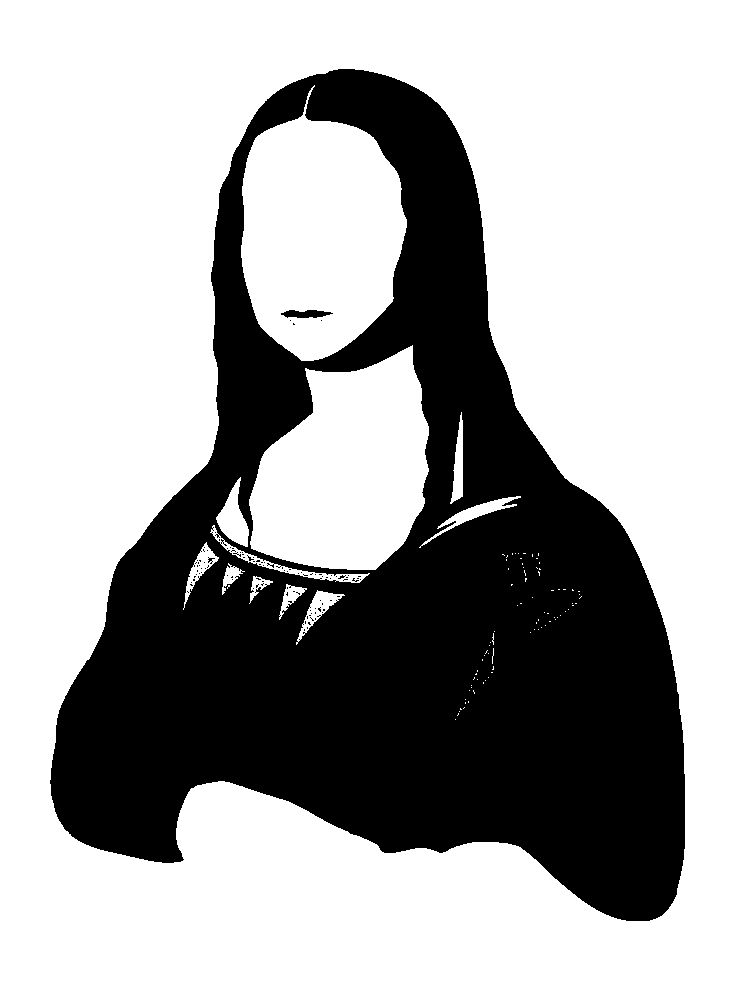

In [80]:
imgOrg = Image.open('minmona.jpg').convert('RGB')


#takes in a picture expected to be RGB not RGBA and a threshold for setting pixel to black or white
def high_contrast(picture, thres):
    pic = picture.copy()
    pixels = pic.load() # create the pixel map
    print(pixels);
    max = 0
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            r,g,b = pixels[i,j];
            average = int((r + b + g) / 3)
            if max < average:
                max = average;
            pixels[i,j] = (average, average, average)
            #print(str(r) + " " + str(g) + " " + str(b))
    #pic.show()
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            r,g,b = pixels[i,j];
            scaled = int(255 * r / max)
            if (scaled < thres) :
                scaled = 0
            else:
                scaled = 255
            pixels[i,j] = (scaled, scaled, scaled)
    return pic

high_contrast(imgOrg, 100)


In [81]:
def blank(picture):
    pic = picture.copy();
    pixels = pic.load()
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            pixels[i,j] = (255, 255, 255)
    return pic

In [82]:
def outline(pic, thres):
    pic = smooth(pic)
    highCon = high_contrast(pic, thres)
    cvHigh = np.array(highCon);
    #print(cvHigh)
    
    #print(cvHigh)
    out = blank(pic)

    #kernel = np.ones((5,5),np.float32)/25
    #cvHigh = cv2.filter2D(cvHigh,-1,kernel)
    #
    #highCon.show()
    



    highConPixels = highCon.load()
    outPixels = out.load()
    
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            if highConPixels[i,j] == (0,0,0):
                if (i == 0):
                    if (j == 0):
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                elif (i == pic.size[0] -1):
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                else:
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
    return out

daOut = outline(imgOrg, 100)
    

In [83]:
def smooth(picture):

    cvHigh = np.array(picture)
    kernel = np.ones((5,5),np.float32)/25
    cvHigh = cv2.filter2D(cvHigh,-1,kernel)
    pic = Image.fromarray(cvHigh)
    return pic

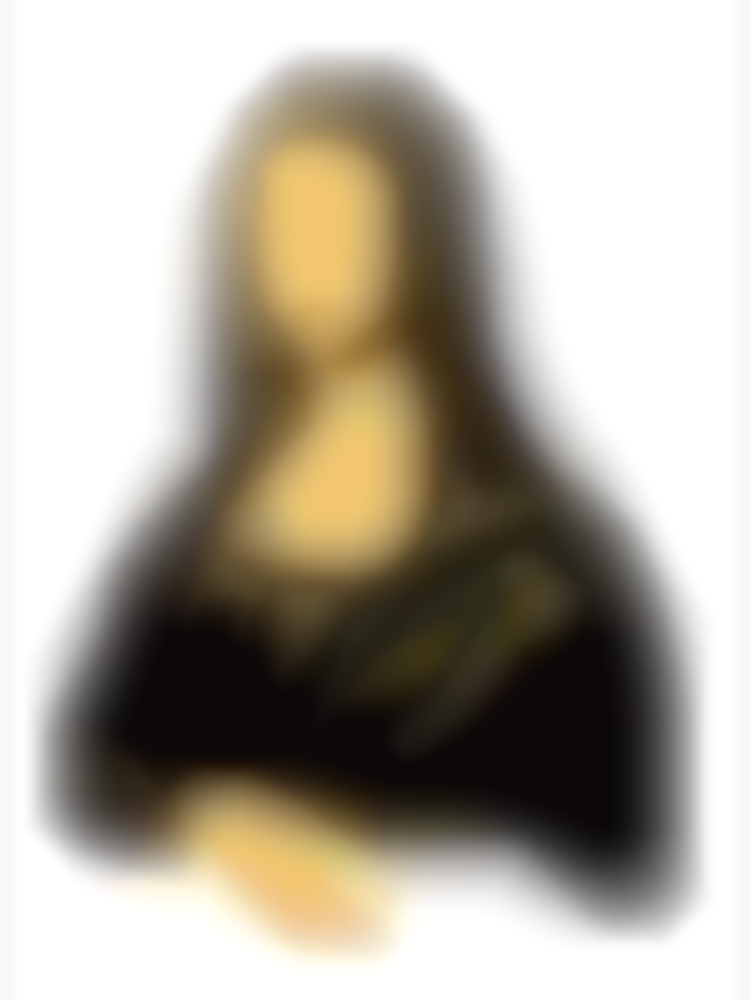

In [84]:
def watercolory(picture):
    pic = smooth(picture)
    for i in range(1000):
        pic = smooth(pic)
    #pic = picture.copy()
    '''
    pic = pic.resize((round(pic.size[0]/32), round(pic.size[1]/32)))
    pic = pic.resize(picture.size)
    '''
    
    
    
    return pic
watercolory(imgOrg)


In [102]:
def separate_helper(start, picture, D3, current):
    pic = picture.load()
    print(len(D3))
    if (current == D3.size):
        make = True
        for other in D3:
            if other[start[0]][start[1]] == 1:
                make = False
    
        if make:
            np.append(D3, np.zeros(picture.size))
    
    if (D3[current][start[0]][start[1]] != 1):
        D3[current][start[0]][start[1]] = 1

        if (pic[start] == (255,255,255)):
            D3[current][start[0]][start[1]] = 1
            if (start[0] == 0):
                if (start[1] == 0):
                    separate_helper((start[0] + 1, start[1]), picture,  D3, current)
                    separate_helper((start[0], start[1] + 1), picture,  D3, current)
                elif (start[1] == picture.size[1]-1):
                    separate_helper((start[0], start[1]-1), picture,  D3, current)
                    separate_helper((start[0] + 1, start[1]), picture,  D3, current)
                else:
                    separate_helper((start[0] + 1, start[1]), picture,  D3, current)
                    separate_helper((start[0], start[1] + 1), picture,  D3, current)
                    separate_helper((start[0], start[1]-1), picture,  D3, current)

            elif (start[0] == picture.size[1]-1):
                if (start[1] == 0):
                    separate_helper((start[0]-1, start[1]), picture, D3, current)
                    separate_helper((start[0], start[1] + 1), picture,  D3, current)
                elif (start[1] == picture.size[1]-1):
                    separate_helper((start[0], start[1]-1), picture,  D3, current)
                    separate_helper((start[0]-1, start[1]), picture, D3, current)
                else:
                    separate_helper((start[0], start[1] + 1), picture,  D3, current)
                    separate_helper((start[0], start[1]-1), picture,  D3, current)
                    separate_helper((start[0]-1, start[1]), picture, D3, current)
            else:
                if (start[1] == 0):
                    separate_helper((start[0] + 1, start[1]), picture,  D3, current)
                    separate_helper((start[0]-1, start[1]), picture, D3, current)
                    separate_helper((start[0], start[1] + 1), picture,  D3, current)
                elif (start[1] == picture.size[1]-1):
                    separate_helper((start[0] + 1, start[1]), picture,  D3, current)
                    separate_helper((start[0], start[1]-1), picture,  D3, current)
                    separate_helper((start[0]-1, start[1]), picture, D3, current)
                else:
                    separate_helper((start[0] + 1, start[1]), picture,  D3, current)
                    separate_helper((start[0], start[1] + 1), picture,  D3, current)
                    separate_helper((start[0], start[1]-1), picture,  D3, current)
                    separate_helper((start[0]-1, start[1]), picture, D3, current)


In [108]:
def separate_obj(picture):
    plane0 = np.zeros(picture.size)
    outlinePixels = picture.load()
    for i in range(picture.size[0]): # for every pixel:
        for j in range(picture.size[1]):
            if (outlinePixels[i,j] == (0,0,0)):
                plane0[i][j] = 1
    
    planes = np.array([])
    planes = np.insert(planes, plane0)
    print(planes)
    currPlane = 1;
    for i in range(picture.size[0]): # for every pixel:
        for j in range(picture.size[1]):
            separate_helper((i,j), picture, planes, len(planes))
    return planes

separate_obj(daOut)


TypeError: _insert_dispatcher() missing 1 required positional argument: 'values'

In [ ]:
'''
void Image::scale(double factor){
    if (factor != 1) {
        Image copy = *this;
        unsigned newHeight = height() * factor;
        unsigned newWidth = width() * factor;
        
        resize(newWidth, newHeight);
        for (unsigned x = 0; x < newWidth; x++) {
            for (unsigned y = 0; y < newHeight; y++) {
                getPixel(x, y) = copy.getPixel(x/factor, y/factor);
            }
        }
    }

}

void Image::scale(unsigned w, unsigned h){
    Image copy = *this;
    unsigned newWidth;
    unsigned newHeight;
    double factor;
    if (width() >= height()) {
        newWidth = w;
        factor = (double) newWidth / width();
        newHeight = factor * height();
        if (newHeight > h) {
            newHeight = h;
            factor = (double) newHeight / height();
            newWidth = width() * factor;
        }
    } else {
        newHeight = h;
        factor  = (double) newHeight / height();
        newWidth = factor * width();
        if (newWidth > w) {
            newWidth = w;
            factor = (double) newWidth / width();
            newHeight = factor * height();
        }
    }
    
    resize(newWidth, newHeight);
    for (unsigned x = 0; x < newWidth; x++) {
        for (unsigned y = 0; y < newHeight; y++) {
            getPixel(x, y) = copy.getPixel(x/factor, y/factor);
        }
    }

}'''